# Data analysis of the models results

This notebook aims to provide analytical tools to work on the damage functions modeled in the WILIAM model folder. 

## Model import and initialisation

In [1]:
import pysd
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


### Trying to figure out why the batch runs don't work : 

#### the parameters were not recognized because the missed their ""

#### trying to run it with only the total radiative forcing parameter
=> when doing with only the radiative forcing as a param, get the following error : 

KeyError: 'total_co2_energy_emissions_9r'

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
File c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pysd\py_backend\cache.py:25, in Cache.__call__.<locals>.cached_func(*args)
     24 try:
---> 25     return self.data[func.__name__]
...
--> 839     raise ValueError("Residuals are not finite in the initial point.")
    841 n = x0.size
    842 m = f0.size

ValueError: Residuals are not finite in the initial point.

That is weird because it seems I was able to batch run with different rcp before. Lets's see what they looked like : 

It does seem to have worked... Let's look what total_forcing looks like : 

## Model runs

In this section, we run the model. 

## Results visualisation

In [12]:
import xarray as xr

ds = xr.open_dataset('results/batch/run_with_1200.nc')
variable = "fund_tot_eq_moneraty_impact"
data = ds[variable].to_dataframe().reset_index()
ds.close()

data = data[data['Run']==1]
data

Run    time REGIONS 35 I  fund_tot_eq_moneraty_impact
210    1  2005.0      AUSTRIA                          NaN
211    1  2005.0      BELGIUM                 1.379671e+09
212    1  2005.0     BULGARIA                 2.799410e+08
213    1  2005.0      CROATIA                 2.565073e+08
214    1  2005.0       CYPRUS                 9.993271e+07
..   ...     ...          ...                          ...
415    1  2010.0        INDIA                 1.186529e+10
416    1  2010.0        LATAM                 1.647699e+10
417    1  2010.0       RUSSIA                 7.563549e+09
418    1  2010.0        USMCA                 6.834936e+10
419    1  2010.0         LROW                 6.189175e+10

[210 rows x 4 columns]

## Mapping a little bit

In [13]:
import pandas as pd
import geopandas as gpd

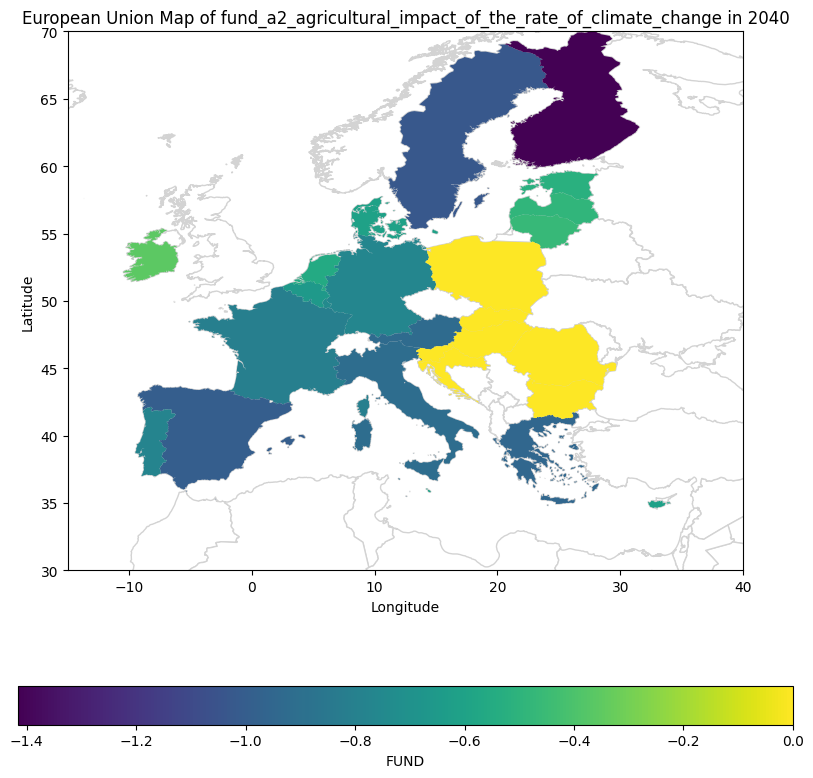

In [ ]:
map_time = 2040
data_map = data[data['time'] == map_time]

map_phenomenon = map.merge(data_map, left_on='Region_WIL', right_on='REGIONS 35 I')

import matplotlib.pyplot as plt


# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
map.plot(ax=ax, color='white', edgecolor='lightgray')
map_phenomenon.plot(ax=ax, 
                    column=variable, 
                    legend=True, 
                    legend_kwds={'label': "FUND", 
                                 'orientation': "horizontal"})

# Set the title and axis labels
ax.set_title(f'European Union Map of {variable} in {map_time}')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Define the bounding box coordinates for continental European Union
x_min = -15
x_max = 40
y_min = 30
y_max = 70

# Set the x and y limits of the plot
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Show the plot
plt.show()



### Generating the spatial normalization parameter

In order to question the spatial equity hypothesis, we want to be able to change the parameter by which local damages are being multiplied. 

The next cell defines what could be sensible values for such a parameter. 

In [ ]:
import numpy as np 


norm_constants = np.random.normal(25000, 5000, 50)
revenue_per_cap = np.linspace(10000, 50000, 1000)
exponents = np.random.uniform(0, 2, 2)

We now want to plot them, to see how these values could look like. The red line shows when the parameter takes value 1, which means there is no change from the initial calculated damage. 

In [ ]:
palette

[(0.0, 0.0, 0.3549019607843137),
 (0.0, 0.0, 0.40980392156862744),
 (0.0, 0.0, 0.4647058823529412),
 (0.0, 0.0, 0.5196078431372548),
 (0.0, 0.0, 0.5745098039215686),
 (0.0, 0.0, 0.6294117647058823),
 (0.0, 0.0, 0.6843137254901961),
 (0.0, 0.0, 0.7392156862745097),
 (0.0, 0.0, 0.7941176470588234),
 (0.0, 0.0, 0.8490196078431371),
 (0.0, 0.0, 0.9039215686274509),
 (0.0, 0.0, 0.9588235294117646),
 (0.0196078431372549, 0.0196078431372549, 1.0),
 (0.09803921568627451, 0.09803921568627451, 1.0),
 (0.17647058823529413, 0.17647058823529413, 1.0),
 (0.2549019607843137, 0.2549019607843137, 1.0),
 (0.3333333333333333, 0.3333333333333333, 1.0),
 (0.4117647058823527, 0.4117647058823527, 1.0),
 (0.49019607843137253, 0.49019607843137253, 1.0),
 (0.5686274509803921, 0.5686274509803921, 1.0),
 (0.6470588235294118, 0.6470588235294118, 1.0),
 (0.7254901960784313, 0.7254901960784313, 1.0),
 (0.803921568627451, 0.803921568627451, 1.0),
 (0.8823529411764706, 0.8823529411764706, 1.0),
 (0.9607843137254902, 0.9607843137254902, 1.0),
 (1.0, 0.9607843137254902, 0.9607843137254902),
 (1.0, 0.8823529411764706, 0.8823529411764706),
 (1.0, 0.803921568627451, 0.803921568627451),
 (1.0, 0.7254901960784313, 0.7254901960784313),
 (1.0, 0.6470588235294117, 0.6470588235294117),
 (1.0, 0.5686274509803921, 0.5686274509803921),
 (1.0, 0.4901960784313726, 0.4901960784313726),
 (1.0, 0.4117647058823529, 0.4117647058823529),
 (1.0, 0.33333333333333337, 0.33333333333333337),
 (1.0, 0.2549019607843137, 0.2549019607843137),
 (1.0, 0.1764705882352946, 0.1764705882352946),
 (1.0, 0.0980392156862745, 0.0980392156862745),
 (1.0, 0.019607843137254943, 0.019607843137254943),
 (0.9705882352941176, 0.0, 0.0),
 (0.9313725490196079, 0.0, 0.0),
 (0.892156862745098, 0.0, 0.0),
 (0.8529411764705882, 0.0, 0.0),
 (0.8137254901960784, 0.0, 0.0),
 (0.7745098039215687, 0.0, 0.0),
 (0.7352941176470589, 0.0, 0.0),
 (0.696078431372549, 0.0, 0.0),
 (0.6568627450980392, 0.0, 0.0),
 (0.6176470588235294, 0.0, 0.0),
 (0.5784313725490196, 0.0, 0.0),
 (0.5392156862745099, 0.0, 0.0)]

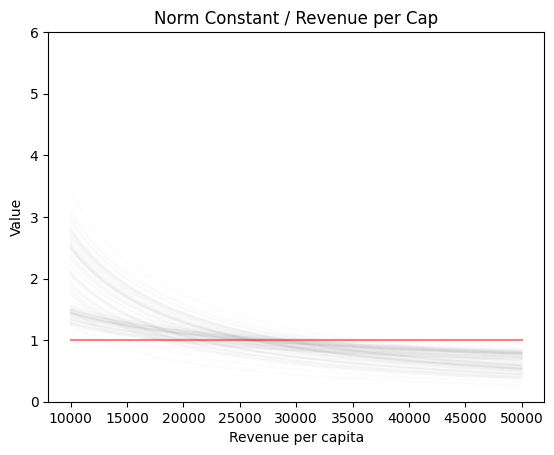

In [ ]:

# Create a color palette based on the exponent values
#palette = sns.color_palette("seismic", len(exponents))

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming norm_constant and revenue_per_cap are available as variables
for norm_constant in norm_constants: 
    for i,  exponent in enumerate(exponents):
        # Calculate the ratio
        normalisation_value = (norm_constant / revenue_per_cap)**exponent

        # Plot the ratio
        sns.lineplot(x=revenue_per_cap, y=normalisation_value, estimator=None, alpha=0.01, color='black')

#plt.plot(x=revenue_per_cap,  y=ratio)

sns.lineplot(x=revenue_per_cap, y=1, estimator=None, alpha=0.5, color='red')

plt.ylim(0, 6)
plt.xlabel('Revenue per capita')
plt.ylabel('Value')
plt.title('Norm Constant / Revenue per Cap')
plt.show()

We now want to add this values to the run manager, alongside the RCP values we want to change. 

In [ ]:
import itertools

cominations = list(itertools.product(norm_constants, exponents, rcps))
run_manager = pd.DataFrame(cominations, columns=['norm_constant', 'exponent', 'RCP'])

run_manager["initial_time"] = 2005
run_manager["final_time"] = 2010
run_manager["time_step"] = 5
run_manager["run_number"] = run_manager.index


run_manager.to_csv('run_manager.csv', index=False)

run_manager

norm_constant  exponent            RCP  initial_time  final_time  \
0     14539.760606  1.860351  WILIAM_RCP4_5          2005        2010   
1     14539.760606  1.860351         RCP6_0          2005        2010   
2     14539.760606  1.860351         RCP4_5          2005        2010   
3     14539.760606  1.860351         RCP2_6          2005        2010   
4     14539.760606  1.860351         RCP8_5          2005        2010   
..             ...       ...            ...           ...         ...   
120   18593.579615  0.204723  WILIAM_RCP4_5          2005        2010   
121   18593.579615  0.204723         RCP6_0          2005        2010   
122   18593.579615  0.204723         RCP4_5          2005        2010   
123   18593.579615  0.204723         RCP2_6          2005        2010   
124   18593.579615  0.204723         RCP8_5          2005        2010   

     time_step  run_number  
0            5           0  
1            5           1  
2            5           2  
3            5           3  
4            5           4  
..         ...         ...  
120          5         120  
121          5         121  
122          5         122  
123          5         123  
124          5         124  

[125 rows x 7 columns]

## Store all the data in the same datasets

Idealy, I have the values in a dataframe. We should be able to do this this way :

In [ ]:
results = model.run()

interest_variables = results.columns
time = results.index


for variable in interest_variables: 
    ds[variable].loc[dict(rcp=rcp, exponent = exponent, norm_constant = norm_constant)]

In [ ]:
import xarray as xr

ds_path = 'results/batch/run_with_1000.nc'

ds = xr.open_dataset(ds_path)

ds

<xarray.Dataset> Size: 649kB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                            pprofile: 4,
                                                                            upper: 3,
                                                                            Run: 3,
                                                                            time: 6)
Coordinates: (12/255)
  * A MATRIX YEARS I                                                       (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                                  (AEZ I) <U13 208B ...
  * AGE ADULTS I                                                           (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                                            (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                                     (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                                      (AGE CHAIN YOUNG I) <U6 360B ...
    ...                                                                     ...
  * bottom                                                                 (bottom) <U6 24B ...
  * lower                                                                  (lower) <U6 72B ...
  * pprofile                                                               (pprofile) <U9 144B ...
  * upper                                                                  (upper) <U6 72B ...
  * time                                                                   (time) float64 48B ...
  * Run                                                                    (Run) int32 12B ...
Data variables: (12/171)
    define_46_eq_damage_function                                           (Run, time) float64 144B ...
    define_tot_eq_define_total_impact                                      (Run, time, REGIONS 35 I) float64 5kB ...
    dice_5_eq_damage_function                                              (Run, time) float64 144B ...
    dice_tot_eq_dice_total_impact                                          (Run, time, REGIONS 35 I) float64 5kB ...
    dsk_tot_eq_dsk_total_impact                                            (Run, time, REGIONS 35 I) float64 5kB ...
    extra_extra_gdp_modifyer                                               (Run, time, REGIONS 35 I) float64 5kB ...
    ...                                                                     ...
    fund_w1_tau_parameter                                                  (Run) float64 24B ...
    fund_extra_initial_revenue                                             (Run, REGIONS 35 I) float64 840B ...
    fund_extra_initial_gdp                                                 (Run, REGIONS 35 I) float64 840B ...
    fund_extra_initial_population                                          (Run, REGIONS 35 I) float64 840B ...
    switch_wiliam_amoc_change                                              (Run) float64 24B ...
    witness_epsilon                                                        (Run) float64 24B ...
Attributes:
    description:   Results for simulation run on Thu Jul 11 03:00:03 2024 usi...
    model_file:    

In [ ]:
data = ds[['define_46_eq_damage_function', 'extra_extra_exponent', 'extra_extra_normalisation_constant' ]].to_dataframe().reset_index()
data

Run    time  define_46_eq_damage_function  extra_extra_exponent  \
0     0  2005.0                      0.002049              0.363178   
1     0  2006.0                      0.002145              0.363178   
2     0  2007.0                      0.002255              0.363178   
3     0  2008.0                      0.002375              0.363178   
4     0  2009.0                      0.002506              0.363178   
5     0  2010.0                      0.002648              0.363178   
6     1  2005.0                      0.002049              0.304110   
7     1  2006.0                      0.002145              0.304110   
8     1  2007.0                      0.002255              0.304110   
9     1  2008.0                      0.002375              0.304110   
10    1  2009.0                      0.002506              0.304110   
11    1  2010.0                      0.002648              0.304110   
12    2  2005.0                      0.002049              1.829984   
13    2  2006.0                      0.002145              1.829984   
14    2  2007.0                      0.002255              1.829984   
15    2  2008.0                      0.002375              1.829984   
16    2  2009.0                      0.002506              1.829984   
17    2  2010.0                      0.002648              1.829984   

    extra_extra_normalisation_constant  
0                         20938.059740  
1                         20938.059740  
2                         20938.059740  
3                         20938.059740  
4                         20938.059740  
5                         20938.059740  
6                         20481.646712  
7                         20481.646712  
8                         20481.646712  
9                         20481.646712  
10                        20481.646712  
11                        20481.646712  
12                        30284.995860  
13                        30284.995860  
14                        30284.995860  
15                        30284.995860  
16                        30284.995860  
17                        30284.995860

In [ ]:
data

Run    time  define_46_eq_damage_function
0      0  2005.0                      0.002049
1      0  2006.0                      0.002145
2      0  2007.0                      0.002255
3      0  2008.0                      0.002375
4      0  2009.0                      0.002506
..   ...     ...                           ...
745  124  2006.0                      0.002145
746  124  2007.0                      0.002255
747  124  2008.0                      0.002375
748  124  2009.0                      0.002506
749  124  2010.0                      0.002648

[750 rows x 3 columns]

<Axes: xlabel='time', ylabel='define_46_eq_damage_function'>

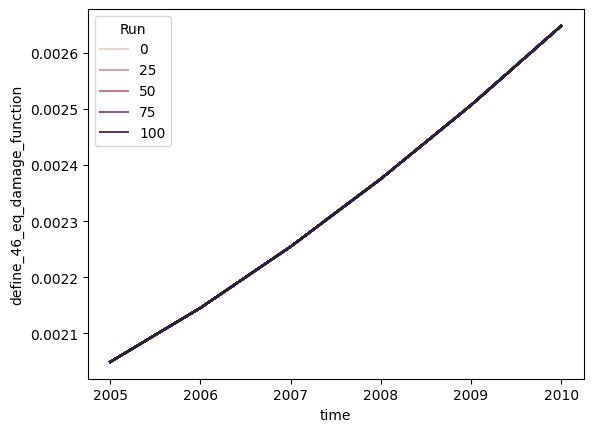

In [ ]:
import seaborn as sns

sns.lineplot(data, x='time', y='define_46_eq_damage_function', hue='Run')

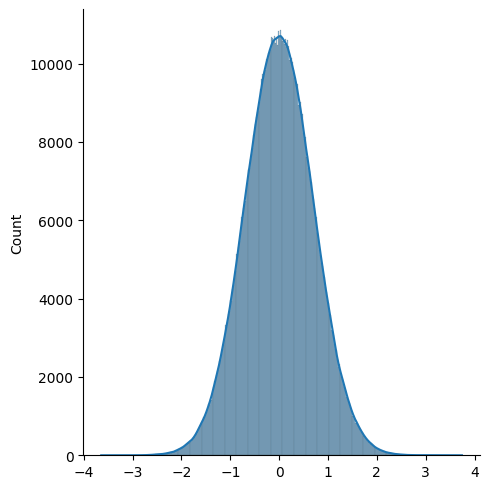

In [ ]:
import numpy as np
import seaborn as sns


dist = np.random.normal(0,0.7,1000000)
sns.displot(dist, kde=True)

In [ ]:
todo = pd.read_csv('variables.csv')
todo['Comment'] = todo['Comment'].fillna('')
todo = todo[todo['Comment'].str.contains('TODO')]
todo

Unnamed: 0                                          Real Name  \
13            13                    DICE: 6: Emissions control rate   
18            18           DSK: A.128: EQ shock from climate change   
19            19    DSK: A.129.1: shock from climate change param 1   
20            20    DSK: A.129.2: shock from climate change param 2   
47            47  FUND: E.2: Autonomous Energy Efficiency Improv...   
55            55  FUND: ETS.1: Benchmark damage from extratropic...   
57            57  FUND: ETS.1: delta storm sensitivity to atmosp...   
73            73                  FUND: HV: EQ vector-born diseases   
146          146                                  FUND: TS.1: alpha   
153          153            FUND: W.1: EQ Change in water resources   
395          395                               CH4 ANTHRO EMISSIONS   
412          412             CH4 TOTAL ANTHRO REST OF EMISSIONS RCP   
1836        1836                               N2O ANTHRO EMISSIONS   
1845        1845             N2O TOTAL ANTHRO REST OF EMISSIONS RCP   
2450        2450                      SHARE AREA FALLOW CROPLAND SP   
3166        3166        carbon stock in managed and primary forests   
3587        3587           factor emission soil landuse to landuse2   
3603        3603                               fertilizers demanded   
4039        4039       land use system stock change factor cropland   
4063        4063                   managed grassland area by region   
4864        4864  vegetation emissions landuse1 to landuse2 byre...   

                                                Py Name  \
13                        dice_6_emissions_control_rate   
18                dsk_a128_eq_shock_from_climate_change   
19          dsk_a1291_shock_from_climate_change_param_1   
20          dsk_a1292_shock_from_climate_change_param_2   
47     fund_e2_autonomous_energy_efficiency_improvement   
55    fund_ets1_benchmark_damage_from_extratropical_...   
57    fund_ets1_delta_storm_sensitivity_to_atmospher...   
73                       fund_hv_eq_vectorborn_diseases   
146                                      fund_ts1_alpha   
153                fund_w1_eq_change_in_water_resources   
395                                ch4_anthro_emissions   
412              ch4_total_anthro_rest_of_emissions_rcp   
1836                               n2o_anthro_emissions   
1845             n2o_total_anthro_rest_of_emissions_rcp   
2450                      share_area_fallow_cropland_sp   
3166        carbon_stock_in_managed_and_primary_forests   
3587           factor_emission_soil_landuse_to_landuse2   
3603                               fertilizers_demanded   
4039       land_use_system_stock_change_factor_cropland   
4063                   managed_grassland_area_by_region   
4864  vegetation_emissions_landuse1_to_landuse2_byre...   

                                     Subscripts    Units      Limits  \
13                                          NaN      NaN  (nan, nan)   
18                                          NaN      NaN  (nan, nan)   
19                                          NaN      NaN  (nan, nan)   
20                                          NaN      NaN  (nan, nan)   
47                                          NaN      NaN  (nan, nan)   
55                             ['REGIONS 35 I']      NaN  (nan, nan)   
57                             ['REGIONS 35 I']      NaN  (nan, nan)   
73                             ['REGIONS 35 I']      NaN  (nan, nan)   
146                                         NaN      NaN  (nan, nan)   
153                            ['REGIONS 35 I']      NaN  (nan, nan)   
395                             ['REGIONS 9 I']  Mt/Year  (nan, nan)   
412             ['REGIONS 9 I', 'RCP Scenario']  Mt/Year  (nan, nan)   
1836                            ['REGIONS 9 I']  Mt/Year  (nan, nan)   
1845            ['REGIONS 9 I', 'RCP Scenario']  Mt/Year  (nan, nan)   
2450                            ['REGIONS 9 I']     DMNL  (nan, 

In [ ]:
import xarray as xr

In [ ]:
ds = xr.open_dataset('results/batch/run_with_1200.nc')
df = ds[["fund_tot_eq_moneraty_impact", "fund_tot_eq_fund_total_impact", "fund_tot_eq_total_deaths"]].to_dataframe().reset_index()
ds.close()

In [ ]:
df_grouped = df.groupby('time').sum().reset_index()
df_grouped = df_grouped.drop(columns=['REGIONS 35 I'])
df_grouped["impact in billions"] = df_grouped["fund_tot_eq_moneraty_impact"] / 1e9
df_grouped["impact in share of global GDP"] = df_grouped["fund_tot_eq_moneraty_impact"] / 1e12
df_grouped

time   Run  fund_tot_eq_moneraty_impact  fund_tot_eq_fund_total_impact  \
0  2005.0  6650                 6.251840e+12                   1.583571e+16   
1  2006.0  6650                 6.312950e+12                   1.626259e+16   
2  2007.0  6650                 6.374527e+12                   1.673293e+16   
3  2008.0  6650                 6.436930e+12                   1.723869e+16   
4  2009.0  6650                 6.500283e+12                   1.777355e+16   
5  2010.0  6650                 6.564640e+12                   1.833292e+16   

   fund_tot_eq_total_deaths  impact in billions  impact in share of global GDP  
0              4.094341e+09         6251.839776                       6.251840  
1              4.191129e+09         6312.949673                       6.312950  
2              4.299286e+09         6374.527028                       6.374527  
3              4.416690e+09         6436.929809                       6.436930  
4              4.541720e+09         6500.283082                       6.500283  
5              4.673217e+09         6564.639842                       6.564640

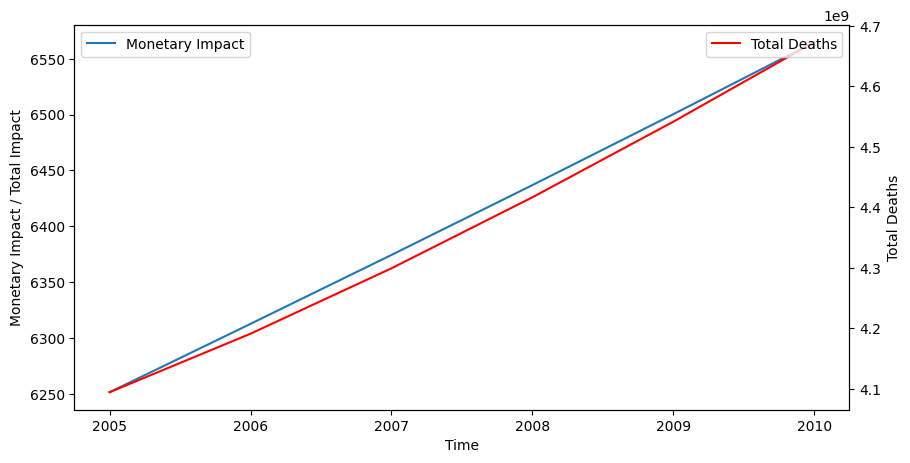

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df_grouped, x='time', y='impact in billions', ax=ax1, label='Monetary Impact')
#sns.lineplot(data=df_grouped, x='time', y='fund_tot_eq_fund_total_impact', ax=ax1, label='Total Impact')

# Second axis
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped, x='time', y='fund_tot_eq_total_deaths', ax=ax2, label='Total Deaths', color='r')

# Labels and legends
ax1.set_xlabel('Time')
ax1.set_ylabel('Monetary Impact / Total Impact')
ax2.set_ylabel('Total Deaths')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


In [ ]:
import utils.variables as vr

print(vr.isInterest("gini_gdppc_eu7"))

False


<Axes: xlabel='time'>

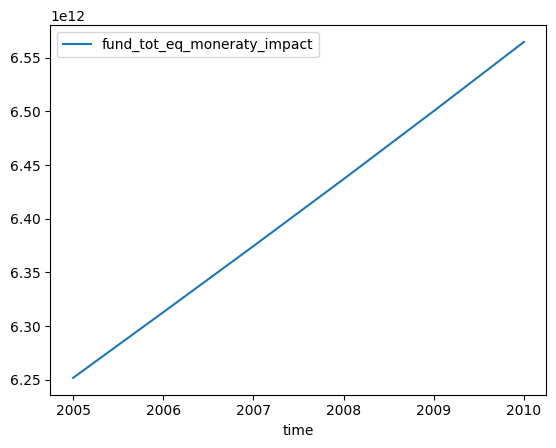

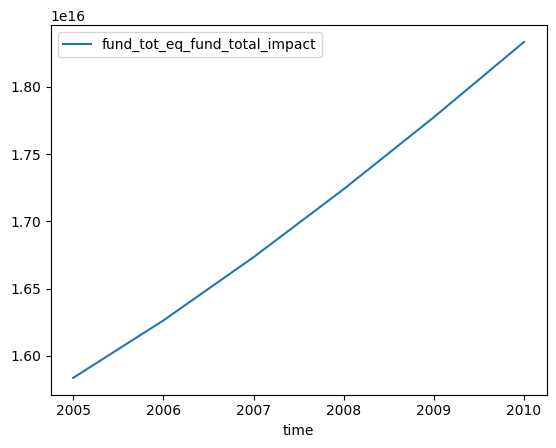

In [ ]:
df_grouped.plot(x='time', y='fund_tot_eq_moneraty_impact', kind='line')
df_grouped.plot(x='time', y='fund_tot_eq_fund_total_impact', kind='line')

In [15]:
import pysd
import xarray as xr

ds = xr.open_dataset('results/batch/run_ds_18_07.nc')
ds


<xarray.Dataset> Size: 13MB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                            pprofile: 4,
                                                                            upper: 3,
                                                                            Run: 15,
                                                                            time: 56)
Coordinates: (12/255)
  * A MATRIX YEARS I                                                       (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                                  (AEZ I) <U13 208B ...
  * AGE ADULTS I                                                           (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                                            (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                                     (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                                      (AGE CHAIN YOUNG I) <U6 360B ...
    ...                                                                     ...
  * bottom                                                                 (bottom) <U6 24B ...
  * lower                                                                  (lower) <U6 72B ...
  * pprofile                                                               (pprofile) <U9 144B ...
  * upper                                                                  (upper) <U6 72B ...
  * time                                                                   (time) float64 448B ...
  * Run                                                                    (Run) int32 60B ...
Data variables: (12/174)
    define_46_eq_damage_function                                           (Run, time) float64 7kB ...
    define_tot_eq_define_total_impact                                      (Run, time, REGIONS 35 I) float64 235kB ...
    dice_5_eq_damage_function                                              (Run, time) float64 7kB ...
    dice_tot_eq_dice_total_impact                                          (Run, time, REGIONS 35 I) float64 235kB ...
    dsk_tot_eq_dsk_total_impact                                            (Run, time, REGIONS 35 I) float64 235kB ...
    extra_extra_gdp_modifyer                                               (Run, time, REGIONS 35 I) float64 235kB ...
    ...                                                                     ...
    fund_w1_tau_parameter                                                  (Run) float64 120B ...
    fund_extra_initial_revenue                                             (Run, REGIONS 35 I) float64 4kB ...
    fund_extra_initial_gdp                                                 (Run, REGIONS 35 I) float64 4kB ...
    fund_extra_initial_population                                          (Run, REGIONS 35 I) float64 4kB ...
    switch_wiliam_amoc_change                                              (Run) float64 120B ...
    witness_epsilon                                                        (Run) float64 120B ...
Attributes:
    description:   Results for simulation run on Wed Jul 17 09:27:03 2024 usi...
    model_f

In [22]:
variables = ['dice_5_eq_damage_function', 'witness_tipping_point_damage_eq_tipping_point_damge', 'witness_dicelike_damage_eq_dicelike_damage', 'dsk_a128_eq_shock_from_climate_change']

df = ds[variables + ['temperature_change', 'total_radiative_forcing']].to_dataframe().reset_index()

# Represent the variable as a percentage
df[variables] = df[variables] * 100

In [32]:
df['total_radiative_forcing'].max()

4.301695981453817

<Axes: ylabel='Density'>

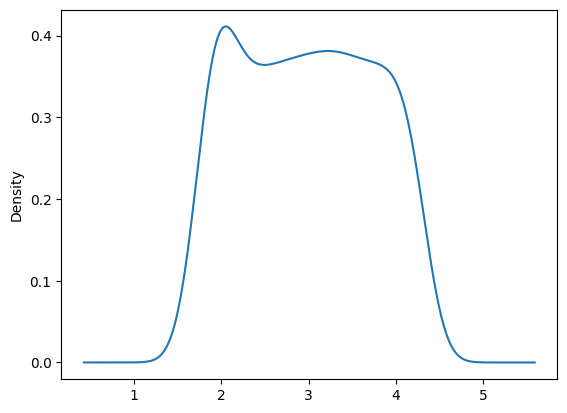

In [31]:
df['total_radiative_forcing'].plot(kind='kde')

<Axes: xlabel='total_radiative_forcing', ylabel='temperature_change'>

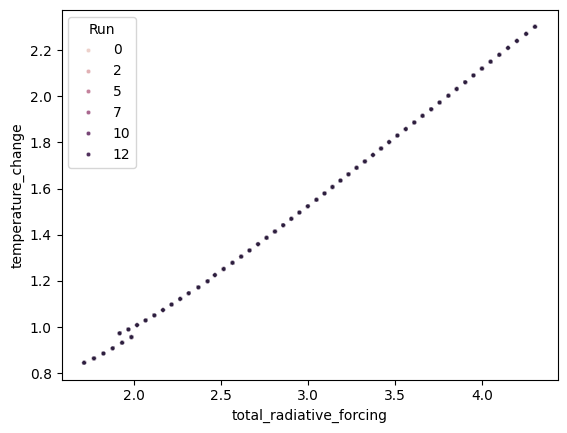

In [26]:
sns.scatterplot(data=df, x='total_radiative_forcing', y='temperature_change', hue='Run', s=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


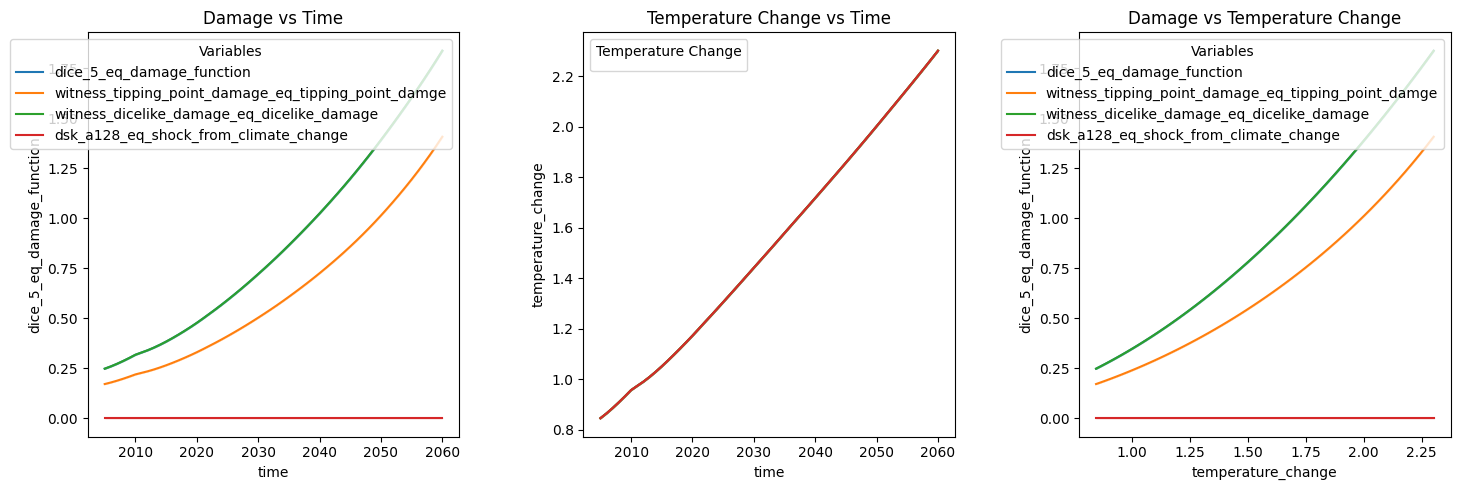

In [18]:

fig, ax = plt.subplots(1,3, figsize=(15, 5))

hue = None

for i, variable in enumerate(variables): 

    sns.lineplot(data=df, x='time', y=variable, ax=ax[0], hue=hue,  label=variable)
    sns.lineplot(data=df, x='time', y='temperature_change', ax=ax[1])
    sns.lineplot(data=df, x='temperature_change', y=variable, ax=ax[2], hue=hue, label=variable)

# Définissez les légendes
ax[0].legend(title='Variables')
ax[1].legend(title='Temperature Change')
ax[2].legend(title='Variables')

# Ajoutez des titres aux sous-graphes
ax[0].set_title('Damage vs Time')
ax[1].set_title('Temperature Change vs Time')
ax[2].set_title('Damage vs Temperature Change')

# Ajustez la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()

Now same with FUND equations : 

In [19]:
all_variables = pd.read_csv('variables.csv')
fund_equations = all_variables[(all_variables['Real Name'].str.contains('FUND')) & (all_variables['Real Name'].str.contains('EQ'))]
fund_equations['Equation category'] = fund_equations['Equation'].str.split('.').str[0].str.strip()
#fund_equations
#fund_equations["Py Name"].values

C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_22264\357925210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_equations['Equation category'] = fund_equations['Equation'].str.split('.').str[0].str.strip()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

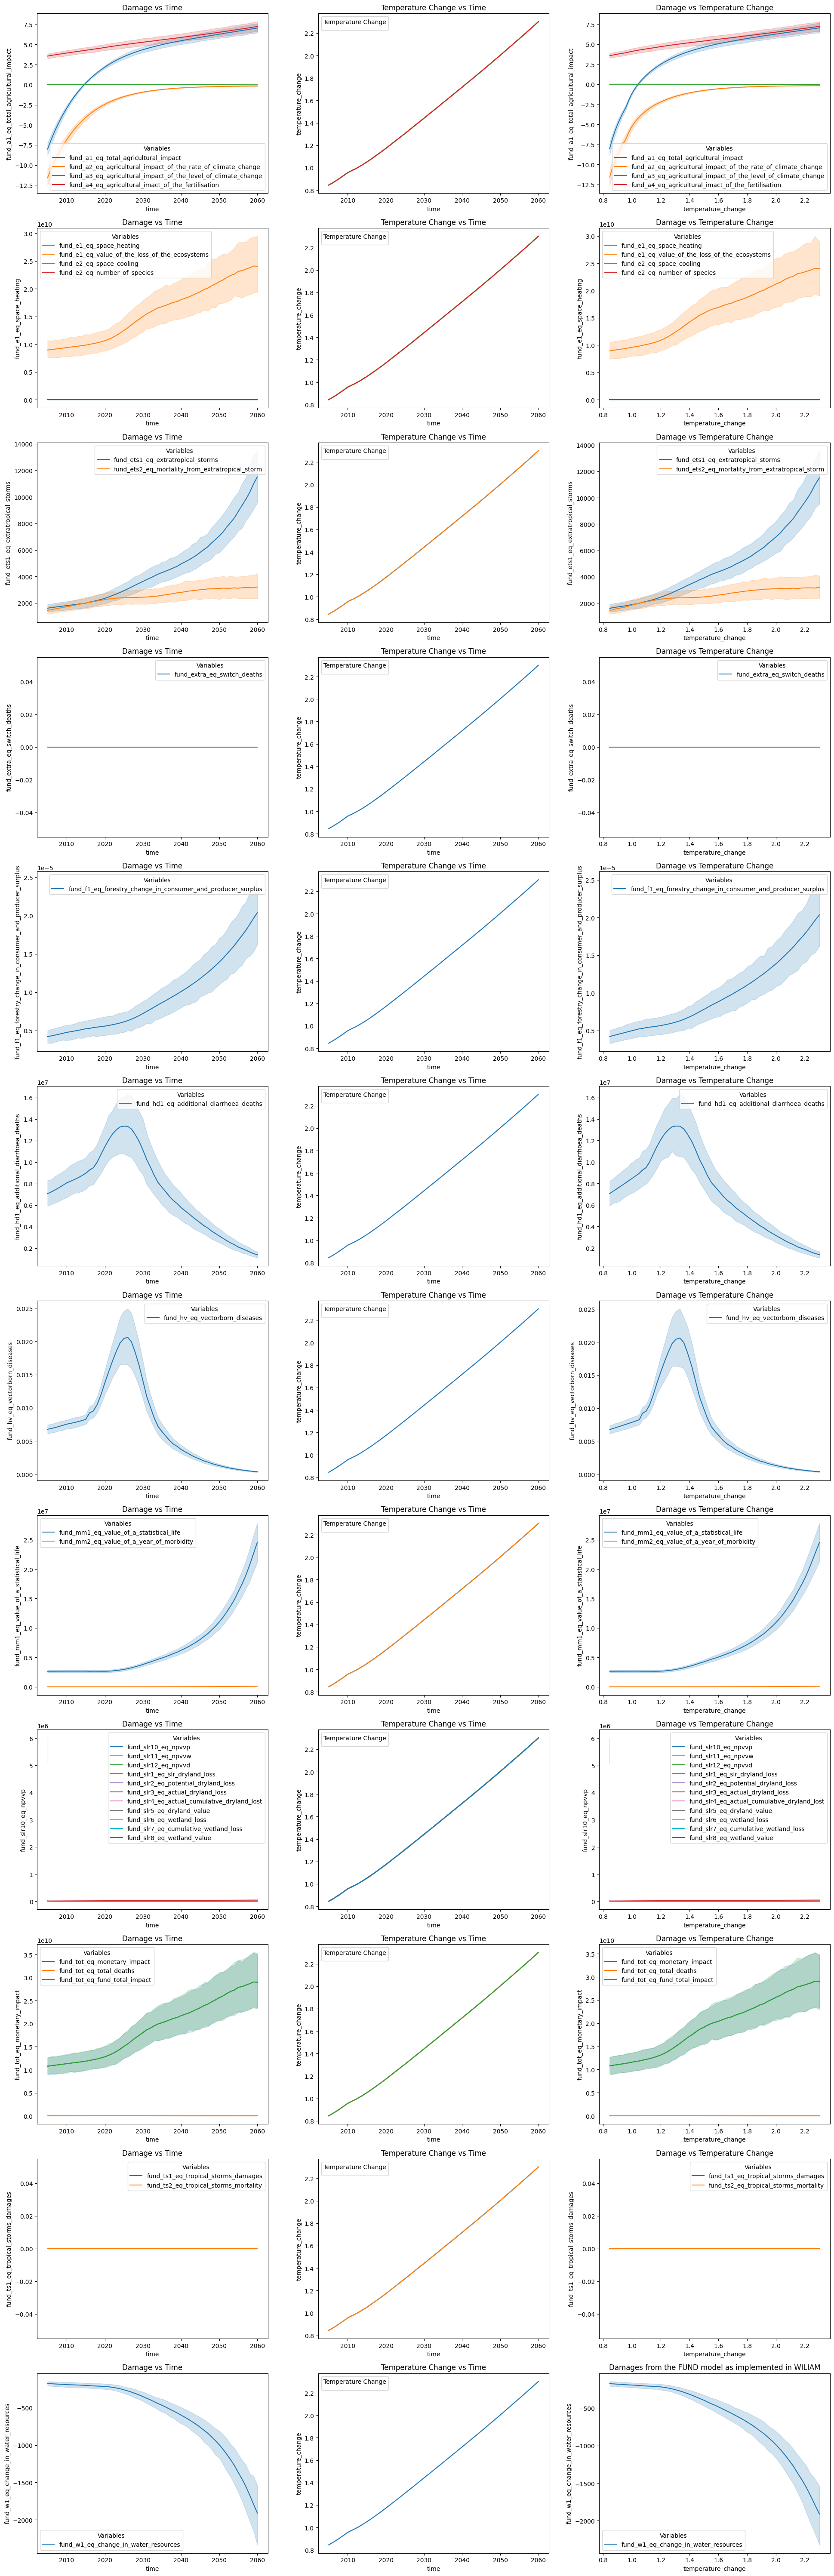

In [20]:
variables = list(fund_equations["Py Name"].values)

#df = ds[variables + ['temperature_change']].to_dataframe().reset_index()

categories = fund_equations['Equation category'].unique()

fig, ax = plt.subplots(len(categories),3, figsize=(20, 5*len(categories)))

hue = None

for j, category in enumerate(categories):

    variables = list(fund_equations[fund_equations['Equation category'] == category]["Py Name"].values)

    df = ds[variables + ['temperature_change']].to_dataframe().reset_index()

    for i, variable in enumerate(variables): 

        sns.lineplot(data=df, x='time', y=variable, ax=ax[j, 0], hue=hue,  label=variable)
        sns.lineplot(data=df, x='time', y='temperature_change', ax=ax[j, 1])
        sns.lineplot(data=df, x='temperature_change', y=variable, ax=ax[j, 2], hue=hue, label=variable)

    # Définissez les légendes
    ax[j,0].legend(title='Variables')
    ax[j,1].legend(title='Temperature Change')
    ax[j,2].legend(title='Variables')

    # Ajoutez des titres aux sous-graphes
    ax[j, 0].set_title('Damage vs Time')
    ax[j,1].set_title('Temperature Change vs Time')
    ax[j,2].set_title('Damage vs Temperature Change')

# Ajustez la disposition pour éviter les chevauchements
plt.title('Damages from the FUND model as implemented in WILIAM')
plt.tight_layout()
plt.show()


In [21]:
for equation_category in fund_equations['Equation category'].values: 
    df = fund_equations[fund_equations["Equation category"] == equation_category]
    variables = list(df["Py Name"].values)

    df = ds[variables].to_dataframe().reset_index().set_index('time')


    #print(type(variables))

KeyError: "None of ['time'] are in the columns"

In [ ]:
for equation_category in fund_equations['Equation category'].values: 
    df = fund_equations[fund_equations["Equation category"] == equation_category]
    variables = df["Py Name"].values

    df = ds[variables + ['temperature_change']].to_dataframe().reset_index()

    fig, ax = plt.subplots(1,3, figsize=(15, 5))

    hue = None

    for i, variable in enumerate(variables): 

        sns.lineplot(data=df, x='time', y=variable, ax=ax[0], hue=hue,  label=variable)
        sns.lineplot(data=df, x='time', y='temperature_change', ax=ax[1])
        sns.lineplot(data=df, x='temperature_change', y=variable, ax=ax[2], hue=hue, label=variable)

    # Définissez les légendes
    ax[0].legend(title='Variables')
    ax[1].legend(title='Temperature Change')
    ax[2].legend(title='Variables')

    # Ajoutez des titres aux sous-graphes
    ax[0].set_title('Damage vs Time')
    ax[1].set_title('Temperature Change vs Time')
    ax[2].set_title('Damage vs Temperature Change')

    # Ajustez la disposition pour éviter les chevauchements
    plt.tight_layout()
    plt.show()

    

KeyError: 'fund_a1_eq_total_agricultural_impacttemperature_change'

In [1]:
print('Executing run.py')

# This script : 
# 1 - loads the VENSIM model into a python model with PySD,
# 2 - launches a run to initialize the variables. Output variables are stored in a xarray dataset
# 3 - Runs the model as many times as required, stores the output variable in the dataset with index 'Run'
# 4 - Saves the dataset to a netCDF file that can be used for the later analysis

import pysd
import xarray as xr
import warnings
import pandas as pd
import numpy as np
import utils.variables as vr


#############################################################
# Load the model and the variables
#############################################################

print('Loading model...')

# Suppress specific warnings to avoid cluttering the output
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Load model
model = pysd.read_vensim('WILIAM/WILIAM.mdl',
                         split_views=True, 
                         subview_sep=["."], 
                         errors='ignore')

print('Model loaded')

# Saving the variables 
variables = model.doc

# Cleaning the variables and identifiying the model and equation 
variables['Real Name'] = variables['Real Name'].str.replace('"', '')
variables['Model'] = variables['Real Name'].str.split(':').str[0]
variables['Equation'] = variables['Real Name'].str.split(':').str[1]
variables['isEquation'] = variables['Real Name'].str.split(':').str[2].str.strip().str.startswith('EQ')
variables.loc[variables['Equation'].isnull(), 'Model'] = np.nan



#variables["Interest"] = variables["Py Name"].apply(lambda x: vr.isInterest(x))
#interest_variables = variables[variables["Interest"] == True]["Py Name"].values
interest_variables = [
    "gini_gdppc_regions", 
    "gini_gdppc_eu27", 
    "temperature_change", 
    "temperature_change_in_35regions", 
    "total_population", 
    "population_35_regions", 
    "total_radiative_forcing", 
    "gross_domestic_product_nominal", 
    "average_disposable_income_per_capita", 
    "extra_extra_gdp_modifyer"
    ]

variables.to_csv('variables.csv')
variables_modelled = variables[variables['Model'].notna()]
variables_modelled_names = variables_modelled['Py Name'].values


# Adding other variables of interest



output_variables = np.concatenate([variables_modelled_names, interest_variables])


runs = pd.read_csv('run_manager.csv')



## Preparing to vary the radiative forcing

# Load the basic radiative forcing 
forcing = pd.read_csv('full_rcp.csv')

# Run the model a first time to initialize the dataset
output_ds_path = 'results/batch/run_ds_19_07_3.nc'

initial_time = 2005
final_time = 2010
time_step = 1 
time_span = time = np.linspace(initial_time, final_time, num=(final_time - initial_time)//time_step + 1)


exponent_values = np.random.normal(0, 1, len(time_span))
exponent = pd.Series(index=time_span, data=exponent_values)

norm_constant_values = np.random.uniform(10000, 50000, len(time_span))
norm_constant = pd.Series(index=time_span, data=norm_constant_values)





############################################################################################################
# Initial run
############################################################################################################


print(f"Initializing the model for the first run")


# Run the model
run = model.run(progress=True,
                params={'"EXTRA: EXTRA: exponent"' : exponent,
                        '"EXTRA: EXTRA: normalisation constant"': norm_constant
                        }, 
                output_file=output_ds_path,
                return_columns=output_variables,
                final_time=final_time)





Executing run.py
Loading model...
Model loaded
Initializing the model for the first run


ETA:  --:--:-- [----------------------------------------------------------]  0%
ETA:   0:02:24 [##--------------------------------------------------------]  5%
ETA:   0:03:05 [#####-----------------------------------------------------] 10%
ETA:   0:02:27 [########--------------------------------------------------] 15%
ETA:   0:02:06 [###########-----------------------------------------------] 20%
ETA:   0:01:49 [##############--------------------------------------------] 25%
ETA:   0:01:38 [#################-----------------------------------------] 30%
ETA:   0:01:27 [####################--------------------------------------] 35%
ETA:   0:01:19 [#######################-----------------------------------] 40%
ETA:   0:01:11 [##########################--------------------------------] 45%
ETA:   0:01:04 [#############################-----------------------------] 50%
ETA:   0:00:57 [###############################---------------------------] 55%
ETA:   0:00:50 [########################

Results stored in results\batch\run_ds_19_07_3.nc


In [53]:
## Preparing the dataset 

ds = xr.open_dataset(output_ds_path)

run_num =  1 #len(runs)
ds = ds.expand_dims({"Run": run_num}).assign_coords({"Run": range(0, run_num)})
ds = ds.rename({'REGIONS 35 I': 'region'})


runs = runs.head(run_num)



############################################################################################################
# Other runs
############################################################################################################

# Iterate over the rows of the run manager
for index, run in runs.iterrows():
    
    first_run = True

    print("Initializing forcing... ")
    rcp = run['RCP']
    forcing_columns = [rcp,  'time']
    total_forcing = forcing[forcing_columns]
    total_forcing = pd.Series(index=total_forcing['time'], data=total_forcing[rcp].values)
    print("Forcing initialized")
    
    exponent_values = np.random.normal(0, 1, len(time_span))
    exponent = pd.Series(index=time_span, data=exponent_values)

    norm_constant_values = np.random.uniform(10000, 50000, len(time_span))
    norm_constant = pd.Series(index=time_span, data=norm_constant_values)

    print(f"Running model for run {run['run_number']}")


    # Run the model
    run = model.run(progress=True,
                    params={'total radiative forcing': total_forcing, 
                            '"EXTRA: EXTRA: exponent"' : exponent,
                            '"EXTRA: EXTRA: normalisation constant"': norm_constant
                            },
                    return_columns=output_variables,
                    final_time=final_time)
    
    # Store the simulation results in a dataframe

    result_variables = run.columns 

    

    extra_extra_exponent_copy = ds["extra_extra_exponent"].copy()
    extra_extra_exponent_copy.loc[dict(Run = index)] = exponent
    ds["extra_extra_exponent"] = extra_extra_exponent_copy

    extra_extra_normalisation_constant_copy = ds["extra_extra_normalisation_constant"].copy()
    extra_extra_normalisation_constant_copy.loc[dict(Run = index)] = norm_constant
    ds["extra_extra_normalisation_constant"] = extra_extra_normalisation_constant_copy


    run = run.reset_index()
    
    for i in range(0, len(run.columns)):

        try: 
                column_name = run.columns.to_list()[i].strip()
                #print(column_name)
                variable_name = column_name.split('[')[0].strip()
                region = column_name.split('[')[1].split(']')[0].strip()
                #print(f'Variable : {variable_name}, region {region}')
                variable_copy = ds[variable_name].copy()
                #print('Before adding')
                #print(run[column_name].values)
                variable_copy.loc[dict(Run = index,  region=region)] = run[column_name].values
                #print('After copying')
                ds[variable_name] = variable_copy
                #print(f"Added variable {variable_name} in region {region} to the dataset.")
                
        except:      
                try: 
                        variable_name = run.columns.to_list()[i].strip()
                        variable_copy = ds[variable_name].copy()
                        variable_copy.loc[dict(Run = index)] = run[variable_name].values
                        ds[variable_name] = variable_copy
                        print(f"NO REGION - Added variable {variable_name} to the dataset.")
                except:
                        print(f'FAILED to add variable {run.columns.to_list()[i]}')


        

Initializing forcing... 
Forcing initialized
Running model for run 0


ETA:  --:--:-- [----------------------------------------------------------]  0%
ETA:   0:00:59 [##--------------------------------------------------------]  5%
ETA:   0:01:19 [#####-----------------------------------------------------] 10%
ETA:   0:01:19 [########--------------------------------------------------] 15%
ETA:   0:01:16 [###########-----------------------------------------------] 20%
ETA:   0:01:13 [##############--------------------------------------------] 25%
ETA:   0:01:11 [#################-----------------------------------------] 30%
ETA:   0:01:07 [####################--------------------------------------] 35%
ETA:   0:01:02 [#######################-----------------------------------] 40%
ETA:   0:00:58 [##########################--------------------------------] 45%
ETA:   0:00:53 [#############################-----------------------------] 50%
ETA:   0:00:48 [###############################---------------------------] 55%
ETA:   0:00:42 [########################

FAILED to add variable time
NO REGION - Added variable define_46_eq_damage_function to the dataset.
FAILED to add variable define_46_eta1
FAILED to add variable define_46_eta2
FAILED to add variable define_46_eta3
FAILED to add variable define_46_exponent
NO REGION - Added variable dice_5_eq_damage_function to the dataset.
FAILED to add variable dice_5_damage_function_phi_1
FAILED to add variable dice_5_damage_function_phi2
FAILED to add variable dice_6_eq_abatment_function
FAILED to add variable dice_6_emissions_control_rate
FAILED to add variable dice_6_abatment_theta_1
FAILED to add variable dice_6_abatment_theta_2
FAILED to add variable dsk_a128_eq_shock_from_climate_change
FAILED to add variable dsk_a1291_shock_from_climate_change_param_1
FAILED to add variable dsk_a1292_shock_from_climate_change_param_2
NO REGION - Added variable extra_extra_exponent to the dataset.
NO REGION - Added variable extra_extra_normalisation_constant to the dataset.
FAILED to add variable fund_a2_alpha_

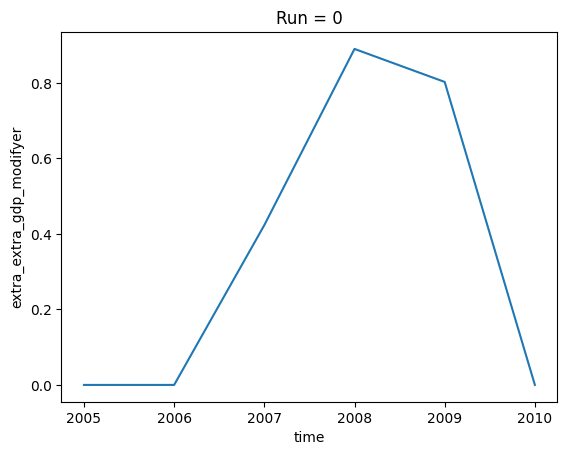

In [56]:
ds.extra_extra_gdp_modifyer.min(dim='region').plot()

In [39]:
ds = ds.rename({'REGIONS 35 I': 'region'})

run = run.reset_index()

time  define_46_eq_damage_function  define_46_eta1  define_46_eta2  \
0  2005.0                      0.002049               0         0.00284   
1  2006.0                      0.002145               0         0.00284   
2  2007.0                      0.002255               0         0.00284   
3  2008.0                      0.002375               0         0.00284   
4  2009.0                      0.002506               0         0.00284   
5  2010.0                      0.002648               0         0.00284   

   define_46_eta3  define_46_exponent  \
0         0.00008               6.754   
1         0.00008               6.754   
2         0.00008               6.754   
3         0.00008               6.754   
4         0.00008               6.754   
5         0.00008               6.754   

   define_tot_eq_define_total_impact[AUSTRIA]  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
5                                         inf   

   define_tot_eq_define_total_impact[BELGIUM]  \
0                                  951.278319   
1                                  798.214154   
2                                 1150.213394   
3                                 1068.710766   
4                                 1859.107119   
5                                  883.747909   

   define_tot_eq_define_total_impact[BULGARIA]  \
0                                    33.144195   
1                                    10.715754   
2                                    16.660963   
3                                    32.086819   
4                                    75.821385   
5                                   411.462493   

   define_tot_eq_define_total_impact[CROATIA]  ...  \
0                                   47.790987  ...   
1                                   21.000163  ...   
2                                   31.815660  ...   
3                                   48.413155  ...   
4                                  103.609306  ...   
5                                  257.741536  ...   

   average_disposable_income_per_capita[SPAIN]  \
0                                 16663.437278   
1                                 16719.931986   
2                                 16774.125741   
3                                 16826.613942   
4                                 16877.815916   
5                                 16928.037071   

   average_disposable_income_per_capita[SWEDEN]  \
0                                  26861.276269   
1                                  26908.252460   
2                                  26939.425546   
3                                  26957.341082   
4                                  26963.697178   
5                                  26959.615406   

   average_disposable_income_per_capita[UK]  \
0                              31993.370259   
1                              31993.370259   
2                              31993.370259   
3                              31993.370259   
4                              31993.370259   
5                              31993.370259   

   average_disposable_income_per_capita[CHINA]  \
0                                  6214.517573   
1                                  6214.517573   
2                                  6214.517573   
3                                  6214.517573   
4                                  6214.517573   
5                                  6214.517573   

   average_disposable_income_per_capita[EASOC]  \
0                                  8636.966732   
1                                  8636.966732   
2                                  8636.966732   
3                                  8636.966732   
4                                  8636.966732   
5                                  8636.966732   

   average_disposable_income_per

In [52]:


for i in range(0, len(run.columns)):
    
    try: 
            column_name = run.columns.to_list()[i].strip()
            #print(column_name)
            variable_name = column_name.split('[')[0].strip()
            region = column_name.split('[')[1].split(']')[0].strip()
            #print(f'Variable : {variable_name}, region {region}')
            variable_copy = ds[variable_name].copy()
            #print('Before adding')
            #print(run[column_name].values)
            variable_copy.loc[dict(Run = index,  region=region)] = run[column_name].values
            #print('After copying')
            ds[variable_name] = variable_copy
            #print(f"Added variable {variable_name} in region {region} to the dataset.")
    except:      
            try: 
                    variable_name = run.columns.to_list()[i].strip()
                    variable_copy = ds[variable_name].copy()
                    variable_copy.loc[dict(Run = index)] = run[variable_name].values
                    ds[variable_name] = variable_copy
                    print(f"NO REGION - Added variable {variable_name} to the dataset.")
            except:
                    print(f'FAILED to add variable {run.columns.to_list()[i]}')

Failed to add variable time
NO REGION - Added variable define_46_eq_damage_function to the dataset.
Failed to add variable define_46_eta1
Failed to add variable define_46_eta2
Failed to add variable define_46_eta3
Failed to add variable define_46_exponent
NO REGION - Added variable dice_5_eq_damage_function to the dataset.
Failed to add variable dice_5_damage_function_phi_1
Failed to add variable dice_5_damage_function_phi2
Failed to add variable dice_6_eq_abatment_function
Failed to add variable dice_6_emissions_control_rate
Failed to add variable dice_6_abatment_theta_1
Failed to add variable dice_6_abatment_theta_2
Failed to add variable dsk_a128_eq_shock_from_climate_change
Failed to add variable dsk_a1291_shock_from_climate_change_param_1
Failed to add variable dsk_a1292_shock_from_climate_change_param_2
NO REGION - Added variable extra_extra_exponent to the dataset.
NO REGION - Added variable extra_extra_normalisation_constant to the dataset.
Failed to add variable fund_a2_alpha_

<xarray.DataArray 'region' (region: 35)> Size: 2kB
array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK', 'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE',
       'HUNGARY', 'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'LUXEMBOURG',
       'MALTA', 'NETHERLANDS', 'POLAND', 'PORTUGAL', 'ROMANIA', 'SLOVAKIA',
       'SLOVENIA', 'SPAIN', 'SWEDEN', 'UK', 'CHINA', 'EASOC', 'INDIA', 'LATAM',
       'RUSSIA', 'USMCA', 'LROW'], dtype='<U14')
Coordinates:
  * region   (region) <U14 2kB 'AUSTRIA' 'BELGIUM' 'BULGARIA' ... 'USMCA' 'LROW'

In [10]:
type(run.columns.to_list())
variable_names = run.columns.to_list()

list

In [20]:
for i in range(0, len(run.columns)):
    try: 
        variable_name = run.columns.to_list()[i].split('[')[0]
        region = run.columns.to_list()[i].split('[')[1].split(']')[0]
        print(f'Voici la variable {variable_name} pour la region {region}')
    except:      
        print(run.columns.to_list()[i])

define_46_eq_damage_function
define_46_eta1
define_46_eta2
define_46_eta3
define_46_exponent
Voici la variable define_tot_eq_define_total_impact pour la region AUSTRIA
Voici la variable define_tot_eq_define_total_impact pour la region BELGIUM
Voici la variable define_tot_eq_define_total_impact pour la region BULGARIA
Voici la variable define_tot_eq_define_total_impact pour la region CROATIA
Voici la variable define_tot_eq_define_total_impact pour la region CYPRUS
Voici la variable define_tot_eq_define_total_impact pour la region CZECH REPUBLIC
Voici la variable define_tot_eq_define_total_impact pour la region DENMARK
Voici la variable define_tot_eq_define_total_impact pour la region ESTONIA
Voici la variable define_tot_eq_define_total_impact pour la region FINLAND
Voici la variable define_tot_eq_define_total_impact pour la region FRANCE
Voici la variable define_tot_eq_define_total_impact pour la region GERMANY
Voici la variable define_tot_eq_define_total_impact pour la region GREECE
Vo

In [ ]:
ds.to_netcdf(output_ds_path)
ds.close()




warnings.resetwarnings()

print('Done every run')